In [16]:
# DOTA的path
DOTA_path = "/media/b622/MainDrive/Dataset/DOTA"

In [17]:
""" 全部15类别
wordname_15 = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',
               'basketball-court', 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter']
"""               

" 全部15类别\nwordname_15 = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 'small-vehicle', 'large-vehicle', 'ship', 'tennis-court',\n               'basketball-court', 'storage-tank',  'soccer-ball-field', 'roundabout', 'harbor', 'swimming-pool', 'helicopter']\n"

In [ ]:
train数据集的BGR平均值为
[79.17037639132391，85.6606903382505，84.31991474247984]
subset_planes_1000数据集的BGR平均值为
[95.21284818121805，100.55917719067031，100.95886891437291]
subset_car_ship_数据集的BGR平均值为:
[84.11219683166574，89.33354797206758，88.1925932654835]

In [ ]:
trainsets=['subset_planes_500_gap200_GSC']

In [1]:
"""
加载依赖项
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab
import sys
# sys.path.append('/home/raymond/project/PytorchSSD_DOTA/data/DOTA_devkit') # 保证DOTA_devkit可用的关键
from DOTA_devkit import DOTA
import torchvision.transforms as transforms
from PIL import Image
import cv2

In [2]:
"""
生成一个DOTA实例
"""
# 调用时要DOTA.DOTA
# 路径最好使用绝对路径
# 测试路径：'/home/raymond/project/DOTA_PyTorch/DOTA_devkit/example'
# train路径：'/media/b622/MainDrive/Dataset/DOTA/train'
#dataset = DOTA.DOTA('/home/raymond/project/PytorchSSD_DOTA/data/DOTA_devkit/classsplit',parseMode='parse_dota_rec')
dataset = DOTA.DOTA('/home/buaab622/data/DOTA/subset_car_ship_500_GSC',parseMode='parse_dota_rec')
#dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train',parseMode = 'parse_dota_rec')
# 路径可能是b622或者raymond，取决于开机时从*哪个账户*登入的MainDrive

 DOTA dataset has been successfully loaded 


加载图片ID完成：共有 723 张图片符合筛选条件
723
(1434, 1400)
<class 'numpy.ndarray'>
torch.Size([3, 1434, 1400])
P2730


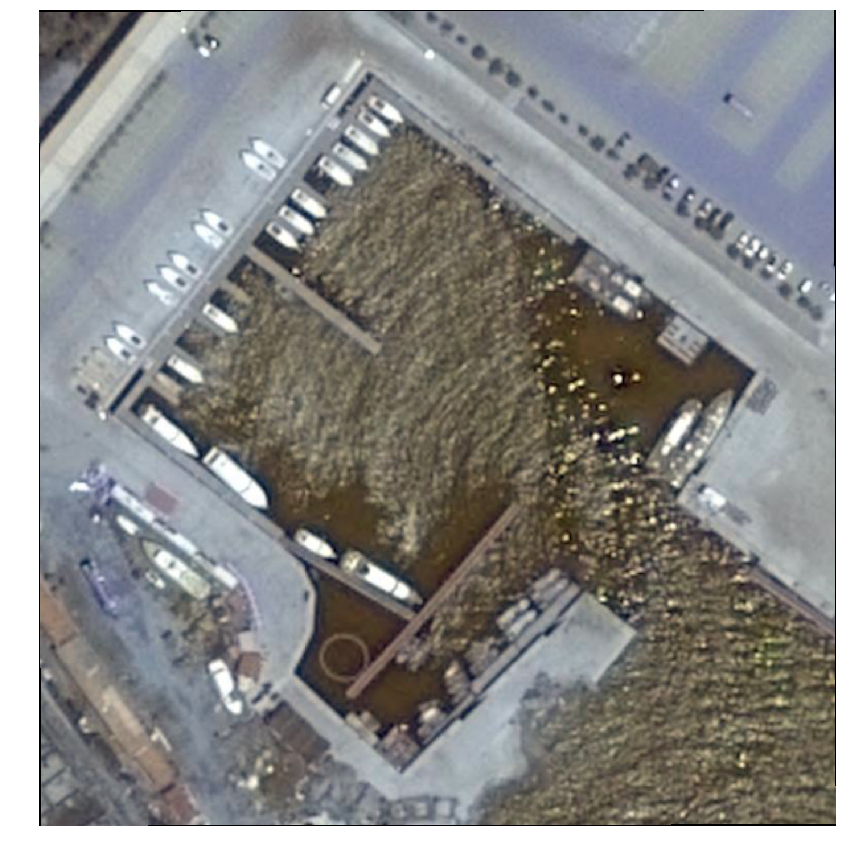

'\nimg_size = np.zeros([len(imgids),2])\ni=0\nfor imgid in imgids:\n    img = dataset.loadImgs(imgid)[0]\n    print(imgid)\n    img1 = transforms.ToTensor()(img)\n    img_size[i,] = img1.shape[:2]\n    i+=1\nimg_size.min(0)\n'

In [71]:
"""
加载包含指定类别目标的图片ID
"""
specific_class = ['ship','small-vehicle']
imgids = dataset.getImgIds(catNms=specific_class)
print(len(imgids))

'''
for i in range(len(imgids)):
    img = dataset.loadImgs(imgids[i])[0]
    img = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    img = img.convert("RGB")
    img = transforms.Resize((300,300))(img)
    img1 = transforms.ToTensor()(img)
    print (img1.size())
'''

imgid = imgids[23]
img = dataset.loadImgs(imgid)[0]
print(img.shape[:2])
# 调试
print(type(img))
img1 = transforms.ToTensor()(img)
print((img1.shape))
print(imgid)
"""
显示图片
"""
pylab.rcParams['figure.figsize'] = (15.0, 15.0) # 调整显示图像大小
plt.axis('off')
plt.imshow(img)
plt.show()

"""
img_size = np.zeros([len(imgids),2])
i=0
for imgid in imgids:
    img = dataset.loadImgs(imgid)[0]
    print(imgid)
    img1 = transforms.ToTensor()(img)
    img_size[i,] = img1.shape[:2]
    i+=1
img_size.min(0)
"""

[{'name': 'ship', 'difficult': '0', 'poly': [(851.0, 1030.0), (866.0, 1045.0), (816.0, 1091.0), (799.0, 1076.0)], 'area': 1501.0, 'bndbox': (799.0, 1030.0, 866.0, 1091.0)}, {'name': 'ship', 'difficult': '0', 'poly': [(418.0, 858.0), (392.0, 887.0), (286.0, 793.0), (309.0, 763.0)], 'area': 5486.5, 'bndbox': (286.0, 763.0, 418.0, 887.0)}, {'name': 'ship', 'difficult': '0', 'poly': [(558.0, 300.0), (539.0, 319.0), (487.0, 274.0), (504.0, 253.0)], 'area': 1888.0, 'bndbox': (487.0, 253.0, 558.0, 319.0)}, {'name': 'ship', 'difficult': '0', 'poly': [(511.0, 355.0), (496.0, 374.0), (441.0, 331.0), (456.0, 311.0)], 'area': 1725.0, 'bndbox': (441.0, 311.0, 511.0, 374.0)}, {'name': 'ship', 'difficult': '0', 'poly': [(493.0, 383.0), (477.0, 404.0), (417.0, 357.0), (434.0, 339.0)], 'area': 1911.0, 'bndbox': (417.0, 339.0, 493.0, 404.0)}, {'name': 'ship', 'difficult': '0', 'poly': [(461.0, 410.0), (446.0, 429.0), (396.0, 386.0), (411.0, 370.0)], 'area': 1497.5, 'bndbox': (396.0, 370.0, 461.0, 429.0)

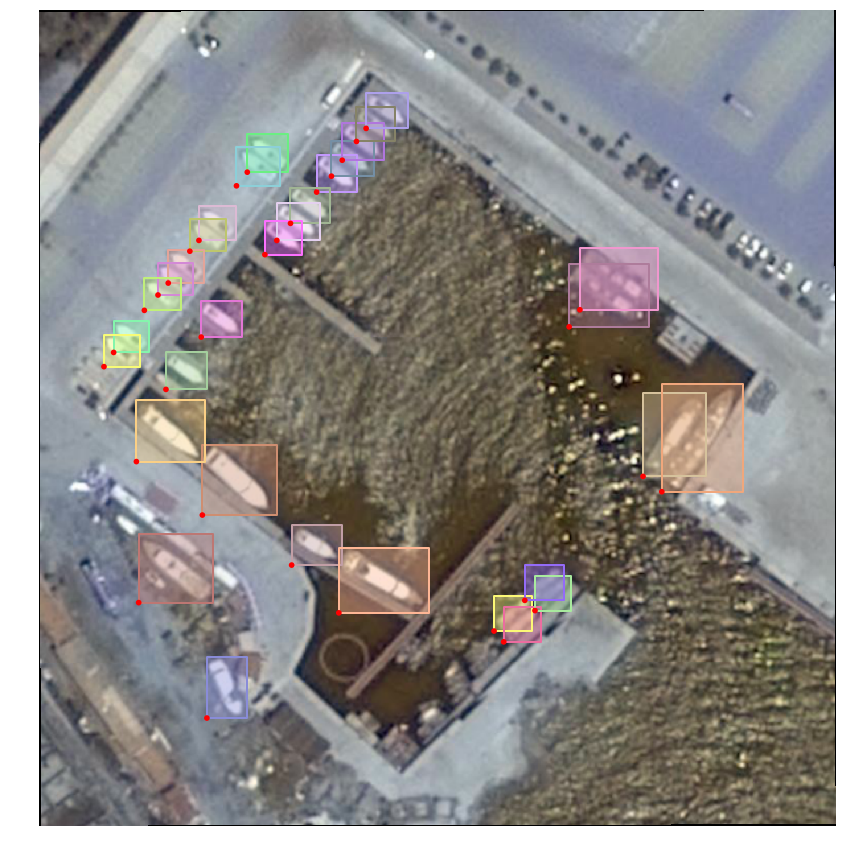

In [72]:
"""
加载与显示标注
"""
anns = dataset.loadAnns(imgId=imgid,catNms=specific_class)
# anns = dataset.loadAnns(imgId=imgid)
print((anns))
dataset.showAnns(anns,imgid,2)

In [13]:
"""
裁剪图像与标注，生成新的数据集
"""
# split image
# cut image (original)
from DOTA_devkit import ImgSplit
# split = ImgSplit.splitbase(r'/media/raymond/MainDrive/Dataset/DOTA/train_test',r'/media/raymond/MainDrive/Dataset/DOTA/splitval',subsize = 300, choosebestpoint=True)
#split.splitdata(1)
dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train',parseMode='parse_dota_rec')
imgids = dataset.getImgIds(catNms=['plane'])
imagelist = imgids
split = ImgSplit.splitbase(r'/media/raymond/MainDrive/Dataset/DOTA/train',r'/media/raymond/MainDrive/Dataset/DOTA/subset_planes_500_gap200',gap=200,subsize = 500, thresh=0.8, choosebestpoint=True)
# split.splitdata(self,rate:int,imglist:List[str])
split.splitdata(1,imagelist)

 DOTA dataset has been successfully loaded 
加载图片ID完成：共有 0 张图片符合筛选条件


PermissionError: [Errno 13] Permission denied: '/media/raymond'

In [6]:
"""
测试Dataloader，是否正确加载数据集
"""
from dota import *
train_dataset = DOTADetection(DOTAroot, image_sets='splittest',preproc=preproc(
        img_dim, rgb_means, rgb_std, p), target_transform=DotaAnnTrans())

ModuleNotFoundError: No module named 'utils'

In [3]:
"""
计算数据集的RGB均值
"""
import os
import numpy as np
import cv2
 
ims_path='/home/buaab622/data/DOTA/subset_car_ship_500_GSC/images'# 图像数据集的路径
ims_list=os.listdir(ims_path)
R_means=[]
G_means=[]
B_means=[]
for im_list in ims_list:
    filepath = ims_path+'/'+im_list
    if os.path.splitext(filepath)[-1] != '.png':
        continue
    im=cv2.imread(ims_path+'/'+im_list)
#extrect value of diffient channel
    im_R=im[:,:,0]
    im_G=im[:,:,1]
    im_B=im[:,:,2]
#count mean for every channel
    im_R_mean=np.mean(im_R)
    im_G_mean=np.mean(im_G)
    im_B_mean=np.mean(im_B)
#save single mean value to a set of means
    R_means.append(im_R_mean)
    G_means.append(im_G_mean)
    B_means.append(im_B_mean)
    #print('图片：{} 的 RGB平均值为 \n[{}，{}，{}]'.format(im_list,im_R_mean,im_G_mean,im_B_mean) )
#three sets  into a large set
a=[R_means,G_means,B_means]
mean=[0,0,0]
#count the sum of different channel means
mean[0]=np.mean(a[0])
mean[1]=np.mean(a[1])
mean[2]=np.mean(a[2])
print('数据集的BGR平均值为\n[{}，{}，{}]'.format( mean[0],mean[1],mean[2]) )
#cv.imread()读取Img时候将rgb转换为了bgr

数据集的BGR平均值为
[84.11219683166574，89.33354797206758，88.1925932654835]


In [20]:
ims_path='/media/raymond/MainDrive/Dataset/DOTA/train/images'# 图像数据集的路径
ims_list=os.listdir(ims_path)
os.path.splitext(ims_path+'/'+im_list)[-1]


'.png'

In [2]:
# TEST
"""
将DOTA标注(.txt)转化为XML格式
"""
import os
import scipy.misc as misc
from xml.dom.minidom import Document
import numpy as np
import copy, cv2

def save_to_xml(save_path, im_height, im_width, objects_axis, label_name):
    im_depth = 0
    object_num = len(objects_axis)
    doc = Document()

    annotation = doc.createElement('annotation')
    doc.appendChild(annotation)

    folder = doc.createElement('folder')
    folder_name = doc.createTextNode('VOC2007')
    folder.appendChild(folder_name)
    annotation.appendChild(folder)

    filename = doc.createElement('filename')
    filename_name = doc.createTextNode('000024.jpg')
    filename.appendChild(filename_name)
    annotation.appendChild(filename)

    source = doc.createElement('source')
    annotation.appendChild(source)

    database = doc.createElement('database')
    database.appendChild(doc.createTextNode('The VOC2007 Database'))
    source.appendChild(database)

    annotation_s = doc.createElement('annotation')
    annotation_s.appendChild(doc.createTextNode('PASCAL VOC2007'))
    source.appendChild(annotation_s)

    image = doc.createElement('image')
    image.appendChild(doc.createTextNode('flickr'))
    source.appendChild(image)

    flickrid = doc.createElement('flickrid')
    flickrid.appendChild(doc.createTextNode('322409915'))
    source.appendChild(flickrid)

    owner = doc.createElement('owner')
    annotation.appendChild(owner)

    flickrid_o = doc.createElement('flickrid')
    flickrid_o.appendChild(doc.createTextNode('knautia'))
    owner.appendChild(flickrid_o)

    name_o = doc.createElement('name')
    name_o.appendChild(doc.createTextNode('raymond'))
    owner.appendChild(name_o)


    size = doc.createElement('size')
    annotation.appendChild(size)
    width = doc.createElement('width')
    width.appendChild(doc.createTextNode(str(im_width)))
    height = doc.createElement('height')
    height.appendChild(doc.createTextNode(str(im_height)))
    depth = doc.createElement('depth')
    depth.appendChild(doc.createTextNode(str(im_depth)))
    size.appendChild(width)
    size.appendChild(height)
    size.appendChild(depth)
    segmented = doc.createElement('segmented')
    segmented.appendChild(doc.createTextNode('0'))
    annotation.appendChild(segmented)
    for i in range(object_num):
        objects = doc.createElement('object')
        annotation.appendChild(objects)
        object_name = doc.createElement('name')
        object_name.appendChild(doc.createTextNode(label_name[int(objects_axis[i][-1])]))
        objects.appendChild(object_name)
        pose = doc.createElement('pose')
        pose.appendChild(doc.createTextNode('Unspecified'))
        objects.appendChild(pose)
        truncated = doc.createElement('truncated')
        truncated.appendChild(doc.createTextNode('1'))
        objects.appendChild(truncated)
        difficult = doc.createElement('difficult')
        difficult.appendChild(doc.createTextNode('0'))
        objects.appendChild(difficult)
        bndbox = doc.createElement('bndbox')
        objects.appendChild(bndbox)
        
        x0 = doc.createElement('x0')
        x0.appendChild(doc.createTextNode(str((objects_axis[i][0]))))
        bndbox.appendChild(x0)
        y0 = doc.createElement('y0')
        y0.appendChild(doc.createTextNode(str((objects_axis[i][1]))))
        bndbox.appendChild(y0)

        x1 = doc.createElement('x1')
        x1.appendChild(doc.createTextNode(str((objects_axis[i][2]))))
        bndbox.appendChild(x1)
        y1 = doc.createElement('y1')
        y1.appendChild(doc.createTextNode(str((objects_axis[i][3]))))
        bndbox.appendChild(y1)
        
        x2 = doc.createElement('x2')
        x2.appendChild(doc.createTextNode(str((objects_axis[i][4]))))
        bndbox.appendChild(x2)
        y2 = doc.createElement('y2')
        y2.appendChild(doc.createTextNode(str((objects_axis[i][5]))))
        bndbox.appendChild(y2)

        x3 = doc.createElement('x3')
        x3.appendChild(doc.createTextNode(str((objects_axis[i][6]))))
        bndbox.appendChild(x3)
        y3 = doc.createElement('y3')
        y3.appendChild(doc.createTextNode(str((objects_axis[i][7]))))
        bndbox.appendChild(y3)
        
    f = open(save_path,'w')
    f.write(doc.toprettyxml(indent = ''))
    f.close() 

class_list = ['plane', 'baseball-diamond', 'bridge', 'ground-track-field', 
'small-vehicle', 'large-vehicle', 'ship', 
'tennis-court', 'basketball-court',  
'storage-tank', 'soccer-ball-field', 
'roundabout', 'harbor', 
'swimming-pool', 'helicopter']




def format_label(txt_list):
    format_data = []
    for i in txt_list[2:]:
        format_data.append(
        [int(xy) for xy in i.split(' ')[:8]] + [class_list.index(i.split(' ')[8])]
        # {'x0': int(i.split(' ')[0]),
        # 'x1': int(i.split(' ')[2]),
        # 'x2': int(i.split(' ')[4]),
        # 'x3': int(i.split(' ')[6]),
        # 'y1': int(i.split(' ')[1]),
        # 'y2': int(i.split(' ')[3]),
        # 'y3': int(i.split(' ')[5]),
        # 'y4': int(i.split(' ')[7]),
        # 'class': class_list.index(i.split(' ')[8]) if i.split(' ')[8] in class_list else 0, 
        # 'difficulty': int(i.split(' ')[9])}
        )
        if i.split(' ')[8] not in class_list :
            print ('warning found a new label :', i.split(' ')[8])
            exit()
    return np.array(format_data)

def clip_image(file_idx, image, boxes_all, width, height):
    # print ('image shape', image.shape)
    if len(boxes_all) > 0:
        shape = image.shape
        for start_h in range(0, shape[0], 256): # 每个子图之间仅相隔256个像素点（gap=256）（大部分重叠）
            for start_w in range(0, shape[1], 256):
                boxes = copy.deepcopy(boxes_all)
                box = np.zeros_like(boxes_all)
                start_h_new = start_h
                start_w_new = start_w
                if start_h + height > shape[0]:
                  start_h_new = shape[0] - height
                if start_w + width > shape[1]:
                  start_w_new = shape[1] - width
                top_left_row = max(start_h_new, 0)
                top_left_col = max(start_w_new, 0)
                bottom_right_row = min(start_h + height, shape[0])
                bottom_right_col = min(start_w + width, shape[1])


                subImage = image[top_left_row:bottom_right_row, top_left_col: bottom_right_col]

                box[:, 0] = boxes[:, 0] - top_left_col
                box[:, 2] = boxes[:, 2] - top_left_col
                box[:, 4] = boxes[:, 4] - top_left_col
                box[:, 6] = boxes[:, 6] - top_left_col

                box[:, 1] = boxes[:, 1] - top_left_row
                box[:, 3] = boxes[:, 3] - top_left_row
                box[:, 5] = boxes[:, 5] - top_left_row
                box[:, 7] = boxes[:, 7] - top_left_row
                box[:, 8] = boxes[:, 8]
                center_y = 0.25*(box[:, 1] + box[:, 3] + box[:, 5] + box[:, 7])
                center_x = 0.25*(box[:, 0] + box[:, 2] + box[:, 4] + box[:, 6])
                # print('center_y', center_y)
                # print('center_x', center_x)
                # print ('boxes', boxes)
                # print ('boxes_all', boxes_all)
                # print ('top_left_col', top_left_col, 'top_left_row', top_left_row)

                cond1 = np.intersect1d(np.where(center_y[:] >=0 )[0], np.where(center_x[:] >=0 )[0])
                cond2 = np.intersect1d(np.where(center_y[:] <= (bottom_right_row - top_left_row))[0],
                                        np.where(center_x[:] <= (bottom_right_col - top_left_col))[0])
                idx = np.intersect1d(cond1, cond2)
                # idx = np.where(center_y[:]>=0 and center_x[:]>=0 and center_y[:] <= (bottom_right_row - top_left_row) and center_x[:] <= (bottom_right_col - top_left_col))[0]
                # save_path, im_width, im_height, objects_axis, label_name
                if len(idx) > 0:
                    xml = os.path.join(save_dir, 'labeltxt', "%s_%04d_%04d.xml" % (file_idx, top_left_row, top_left_col))
                    save_to_xml(xml, subImage.shape[0], subImage.shape[1], box[idx, :], class_list)
                    # print ('save xml : ', xml)
                    if subImage.shape[0] > 5 and subImage.shape[1] >5:
                        img = os.path.join(save_dir, 'images', "%s_%04d_%04d.png" % (file_idx, top_left_row, top_left_col))
                        cv2.imwrite(img, subImage)
        
    
    

print ('class_list', len(class_list))
raw_data = '/media/raymond/MainDrive/Dataset/DOTA/train_test'
raw_images_dir = os.path.join(raw_data, 'images')
raw_label_dir = os.path.join(raw_data, 'labelTxt')

save_dir = '/media/raymond/MainDrive/Dataset/DOTA/DOTA_clip/train_test/'

images = [i for i in os.listdir(raw_images_dir) if 'png' in i]
labels = [i for i in os.listdir(raw_label_dir) if 'txt' in i]

print ('find image', len(images))
print ('find label', len(labels))

min_length = 1e10
max_length = 1

for idx, img in enumerate(images):
# img = 'P1524.png'
    print (idx, 'read image', img)
    img_data = misc.imread(os.path.join(raw_images_dir, img))
    # img_data = cv2.imread(os.path.join(raw_images_dir, img))
    # if len(img_data.shape) == 2:
        # img_data = img_data[:, :, np.newaxis]
        # print ('find gray image')

    txt_data = open(os.path.join(raw_label_dir, img.replace('png', 'txt')), 'r').readlines()
    # print (idx, len(format_label(txt_data)), img_data.shape)
    # if max(img_data.shape[:2]) > max_length:
        # max_length = max(img_data.shape[:2])
    # if min(img_data.shape[:2]) < min_length:
        # min_length = min(img_data.shape[:2])
    # if idx % 50 ==0:
        # print (idx, len(format_label(txt_data)), img_data.shape)
        # print (idx, 'min_length', min_length, 'max_length', max_length)
    box = format_label(txt_data)
    clip_image(img.strip('.png'), img_data, box, 800, 800)
    
    
    
    
    
#     rm train/images/*   &&   rm train/labeltxt/*

class_list 15
find image 10
find label 10
0 read image P0000.png


/home/raymond/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


1 read image P0001.png
2 read image P0002.png
3 read image P0005.png
4 read image P0008.png
5 read image P0010.png
6 read image P0011.png
7 read image P0012.png
8 read image P0013.png
9 read image P0018.png


In [4]:
"""
统计目标框的大小、宽高比（以调节Anchor box的宽高比）
"""
"""
加载依赖项
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab
import sys
# sys.path.append('/home/raymond/project/PytorchSSD_DOTA/data/DOTA_devkit') # 保证DOTA_devkit可用的关键
from DOTA_devkit import DOTA
import torchvision.transforms as transforms
from PIL import Image
import cv2

dataset = DOTA.DOTA('/home/buaab622/data/DOTA/subset_car_ship_500_GSC',parseMode='parse_dota_rec')
#dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train_test',parseMode = 'parse_dota_rec')
DOTA_CLASSES = ('__background__', 'ship','small-vehicle')
class_to_ind =dict(zip(DOTA_CLASSES, range(len(DOTA_CLASSES))))
"""
加载包含指定类别目标的图片ID
"""
specific_class = ['ship','small-vehicle']
imgids = dataset.getImgIds(catNms=specific_class)
print(len(imgids))
res = np.empty((0, 4))
for imgid in imgids:
    img = dataset.loadImgs(imgid)[0]
    anns = dataset.loadAnns(imgId=imgid,catNms=specific_class)
    labels = []
    # 解析DOTA.loadAnns返回的Anns
    for num,ann in enumerate(anns):
        labels.append([])
        xmin,ymin,xmax,ymax = list(ann['bndbox'])
        w = xmax - xmin
        h = ymax - ymin
        w_h = w/h
        labels[num].extend([w,h,w_h])
        labels[num].append(class_to_ind[ann['name']])
    res = np.vstack((res, labels))  # [xmin, ymin, xmax, ymax, label_ind]
#print(res)
#print(res[:,0])

 DOTA dataset has been successfully loaded 
加载图片ID完成：共有 12535 张图片符合筛选条件
12535


min_w =  2.0
max_w =  499.0
min_h =  3.0
max_h =  499.0


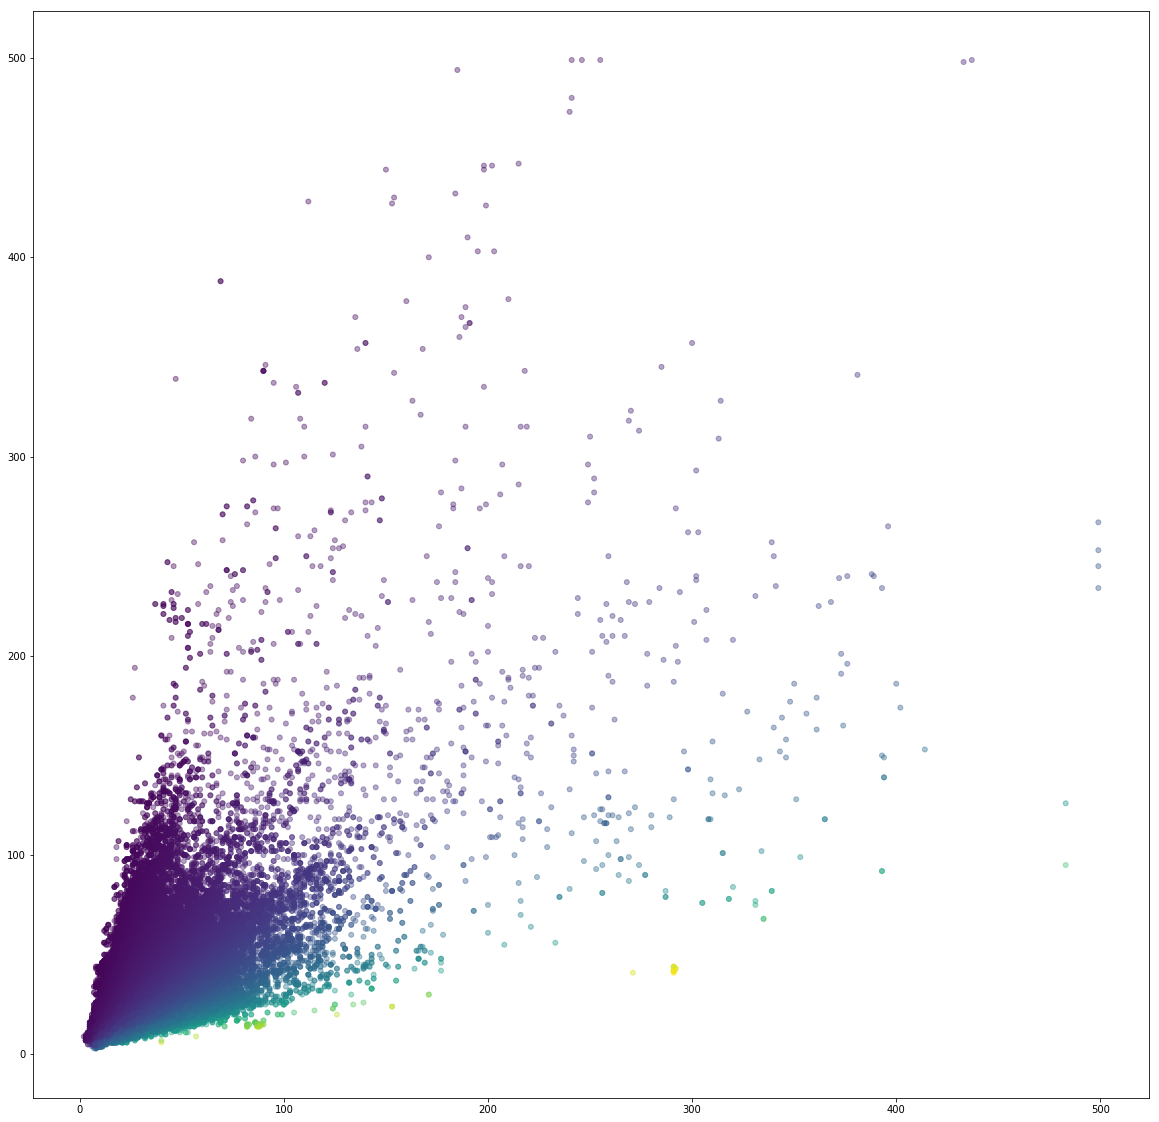

In [7]:
# 可视化
plt.figure()

pylab.rcParams['figure.figsize'] = (20.0, 20.0) # 调整显示图像大小
#rand 均匀分布和 randn高斯分布
print("min_w = ",np.min(res[:,0]))
print("max_w = ",np.max(res[:,0]))
print("min_h = ",np.min(res[:,1]))
print("max_h = ",np.max(res[:,1]))
x=res[:,0]
y=res[:,1]
#T=np.arctan2(x,y)
T=np.divide(x,y)
plt.scatter(x,y,c=T,s=25,alpha=0.4,marker='o')
#T:散点的颜色
#s：散点的大小
#alpha:是透明程度
plt.show()

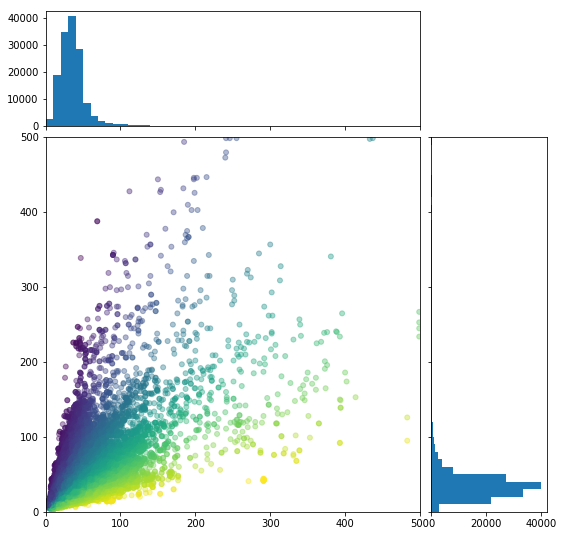

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)


# the random data
x=res[:,0]
y=res[:,1]

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# set scatter color
T=np.arctan2(x,y)
# the scatter plot:
axScatter.scatter(x, y, c =T,s=25,alpha=0.4,marker='o')

# now determine nice limits by hand:
binwidth = 10
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

(142851,)
7.097560975609756
[0.13864307 0.20823225 0.27782143 0.34741061 0.41699978 0.48658896
 0.55617814 0.62576732 0.6953565  0.76494568 0.83453486 0.90412404
 0.97371322 1.0433024  1.11289157 1.18248075 1.25206993 1.32165911
 1.39124829 1.46083747 1.53042665 1.60001583 1.66960501 1.73919419
 1.80878337 1.87837254 1.94796172 2.0175509  2.08714008 2.15672926
 2.22631844 2.29590762 2.3654968  2.43508598 2.50467516 2.57426434
 2.64385351 2.71344269 2.78303187 2.85262105 2.92221023 2.99179941
 3.06138859 3.13097777 3.20056695 3.27015613 3.33974531 3.40933448
 3.47892366 3.54851284 3.61810202 3.6876912  3.75728038 3.82686956
 3.89645874 3.96604792 4.0356371  4.10522628 4.17481545 4.24440463
 4.31399381 4.38358299 4.45317217 4.52276135 4.59235053 4.66193971
 4.73152889 4.80111807 4.87070725 4.94029642 5.0098856  5.07947478
 5.14906396 5.21865314 5.28824232 5.3578315  5.42742068 5.49700986
 5.56659904 5.63618821 5.70577739 5.77536657 5.84495575 5.91454493
 5.98413411 6.05372329 6.12331247 

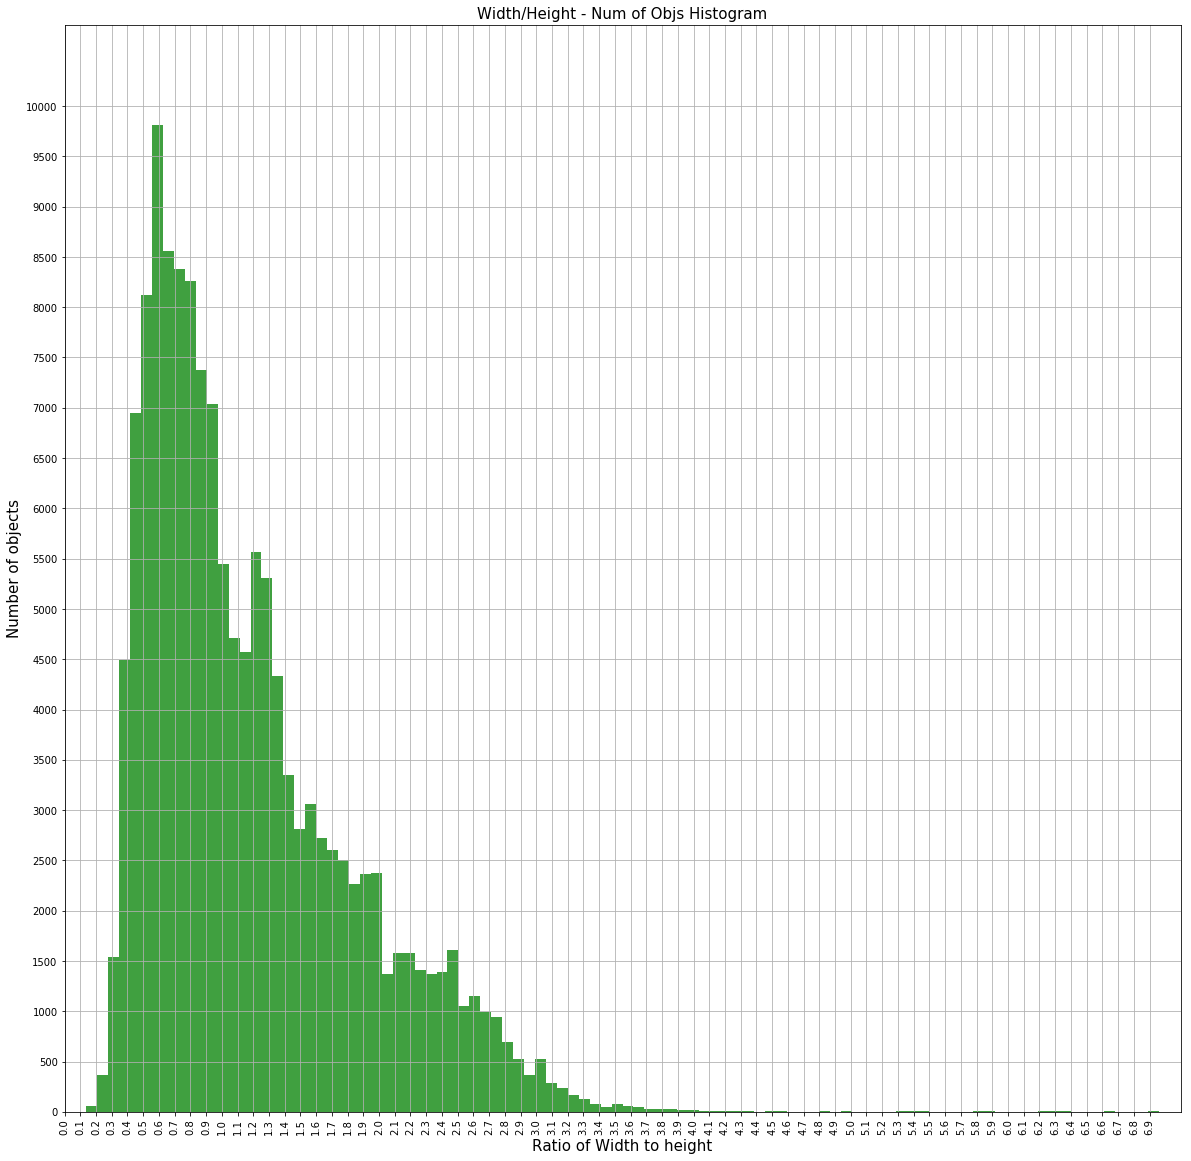

In [111]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.pyplot import savefig
from pylab import *
pylab.rcParams['figure.figsize'] = (20.0, 20.0) # 调整显示图像大小
# Fixing random state for reproducibility
np.random.seed(19680801)
x = np.divide(res[:,0],res[:,1])
print(x.shape)
print(max(x))
# the histogram of the data
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=0.75)
print(bins)
plt.xlabel('Ratio of Width to height',size =15)
plt.ylabel('Number of objects',size =15)
plt.title('Width/Height - Num of Objs Histogram',size =15)
plt.axis([0, max(x), 0, max(n)+1000])

plt.xticks([x*0.1 for x in range(70)],rotation=90,size=10)
plt.yticks([x*500 for x in range(21)],size=10)
plt.grid(True)
savefig("Width-Height-NumofObjs-Histogram.jpg")
plt.show()

In [30]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
min(x)

43.37480693553235

In [5]:
a = 2 
if a == 3 or 2:
    print('5')

5


In [133]:
(72+1) %(723//10)

1

In [134]:
723/10*1

72.3

In [135]:
723/(72+1)

9.904109589041095

In [136]:
(72+1)//(723/10)*10

1.0

In [138]:
print("already finished: "+str((72+1)//(723/10)*10)+" %")

already finished: 10.0 %


In [59]:
[i*0.5 for i in range(10)]

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]